# TOIs in cluster catalog

In [1]:
import pandas as pd

d = pd.read_csv('../data/tois_in_cluster.csv', index_col=0)
d.dropna().sort_values(by='distance')

,cluster,distance
450,COL,0.000004
837,IC_2602,0.000012
581,Trumpler_10,0.000021
893,NGC_2306,0.000027
681,NGC_2516,0.000047
839,Loden_306,0.000063
861,NGC_2516,0.000064
580,Vel_OB2,0.000076


## get gaia params for each TOI

In [2]:
from chronos.utils import query_gaia_params_of_all_tois

toi_gaia_params = query_gaia_params_of_all_tois(verbose=True, clobber=False)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Loaded: /home/jp/github/research/project/chronos/chronos/../data/toi_gaia_params.hdf5


In [3]:
toi_gaia_params.head(3)

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
TOI,,,,,,,,,,,,,,,,,,,,,
101,1635721458409799680,Gaia DR2 6462994429708755072,6462994429708755072,332857530,2015.5,318.737,0.0215141,-55.8719,0.0209095,2.63604,...,0.0024,0.0278,200111,0.87444,0.725109,0.919871,0.774228,0.758957,0.789501,0.00041078
102,1635721458409799680,Gaia DR2 4756649415309914240,4756649415309914240,368697484,2015.5,87.1398,0.0177795,-63.9883,0.0195084,5.66486,...,0.035,0.1713,200111,1.29827,1.14553,1.36217,2.13853,2.12494,2.15212,0.000340658
103,1635721458409799680,Gaia DR2 6805886373600546176,6805886373600546176,1298169308,2015.5,312.457,0.0385101,-24.4287,0.024196,2.40421,...,0.015,0.154,200111,1.2507,1.17037,1.31592,2.21443,2.15539,2.27347,0.000662245


## toi 450 in COL?

In [4]:
from chronos.search import Cluster

c = Cluster(cluster_name='COL', verbose=False)
df_mem = c.query_cluster_members()
df_mem.shape

(22, 22)

In [5]:
df_mem_gaia_params = c.query_cluster_members_gaia_params(df=None, radius=3, clobber=False)
df_mem_gaia_params.shape

(22, 95)

In [6]:
from chronos.search import Target
t = Target(toiid=450.01, verbose=False)
#query gaia catalog and set target gaia id
_ = t.query_gaia_dr2_catalog(radius=3, return_nearest_xmatch=True)

Text(0.5, 1.0, '')

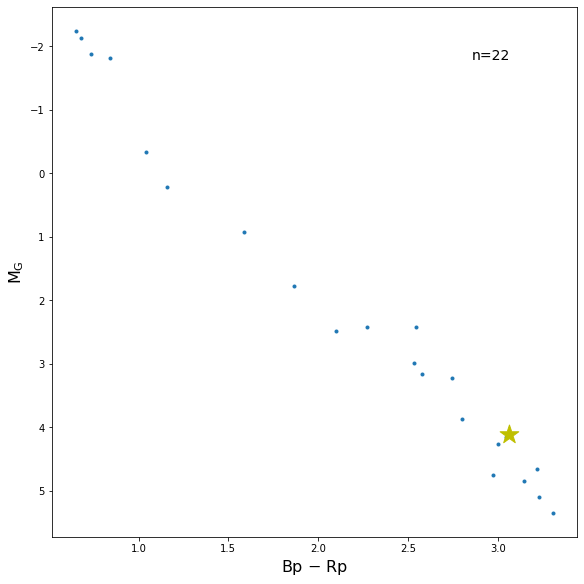

In [7]:
from chronos.plot import plot_hrd
import matplotlib.pyplot as pl

fig = plot_hrd(df=df_mem, target_gaia_id=t.gaiaid);
pl.title(c.cluster_name)

In [8]:
from chronos.utils import get_transformed_coord

df_mem_gaia_params = get_transformed_coord(df_mem_gaia_params, frame='galactocentric')

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



In [9]:
df_mem_gaia_params = df_mem_gaia_params[df_mem_gaia_params.Y>-200]

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



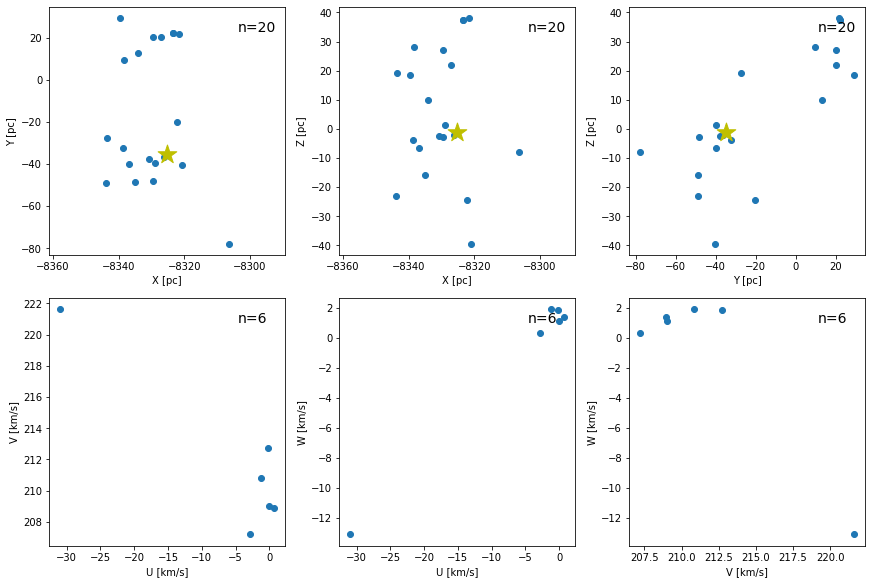

In [10]:
from chronos.plot import plot_xyz_uvw

fig = plot_xyz_uvw(df=df_mem_gaia_params, target_gaia_id=t.gaiaid, verbose=True);
fig.suptitle(c.cluster_name)

## toi 581 in Trumpler10?

In [11]:
from chronos.search import Cluster

c = Cluster(cluster_name='Trumpler_10', verbose=False)
df_mem = c.query_cluster_members()
df_mem.shape

(573, 22)

In [12]:
#limit only to bright members
df_mem = df_mem[df_mem.phot_g_mean_mag<10]

In [13]:
df_mem_gaia_params = c.query_cluster_members_gaia_params(df=df_mem, radius=3, clobber=False)
df_mem_gaia_params.shape

(402, 95)

In [14]:
from chronos.search import Target
t = Target(toiid=581.01, verbose=False)
#query gaia catalog and set target gaia id
_ = t.query_gaia_dr2_catalog(radius=3, return_nearest_xmatch=True)

In [15]:
t.gaiaid

5525188767305211904

Text(0.5, 1.0, 'Trumpler_10')

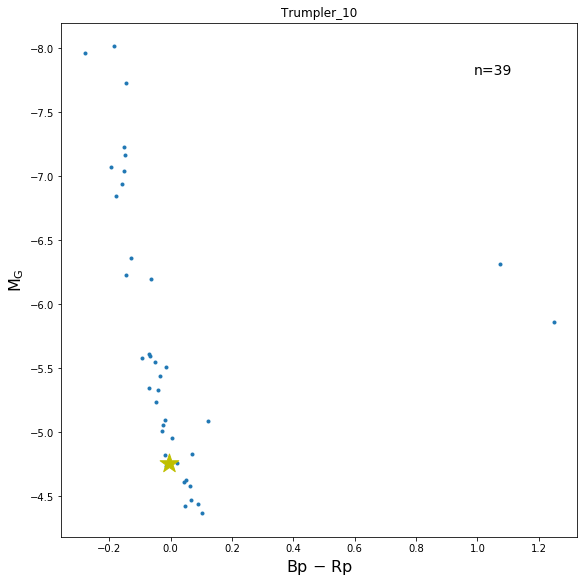

In [16]:
from chronos.plot import plot_hrd
import matplotlib.pyplot as pl

fig = plot_hrd(df=df_mem, target_gaia_id=t.gaiaid);
pl.title(c.cluster_name)

Text(0.5, 0.98, 'Trumpler_10')

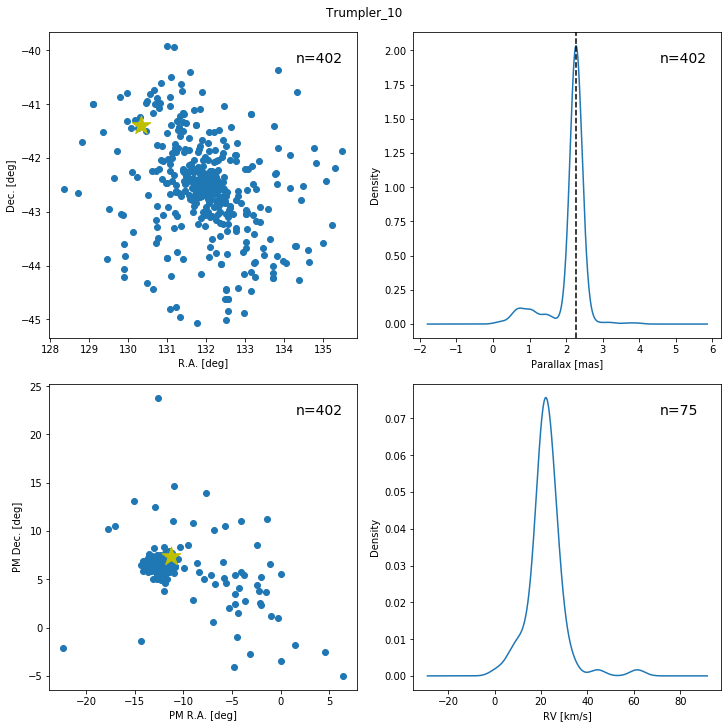

In [17]:
from chronos.plot import plot_rdp_pmrv
fig = plot_rdp_pmrv(df=df_mem_gaia_params, target_gaia_id=t.gaiaid);
fig.suptitle(c.cluster_name)

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



Text(0.5, 0.98, 'Trumpler_10')

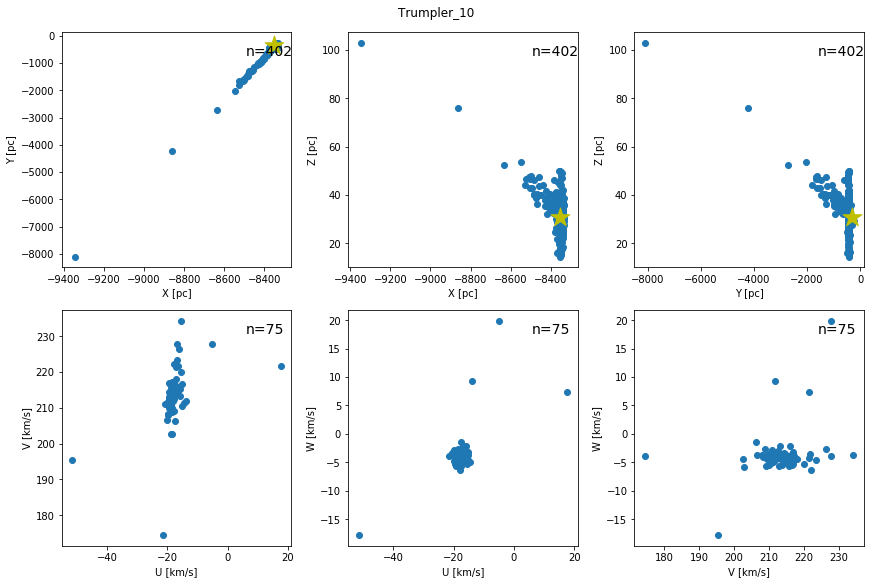

In [18]:
from chronos.plot import plot_xyz_uvw

fig = plot_xyz_uvw(df=df_mem_gaia_params, target_gaia_id=t.gaiaid, verbose=True);
fig.suptitle(c.cluster_name)

In [20]:
from chronos.utils import get_transformed_coord

df_mem_gaia_params = get_transformed_coord(df_mem_gaia_params, frame='galactocentric')

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



In [22]:
df_mem_gaia_params = df_mem_gaia_params[df_mem_gaia_params.Y>-500]

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



Text(0.5, 1.0, '')

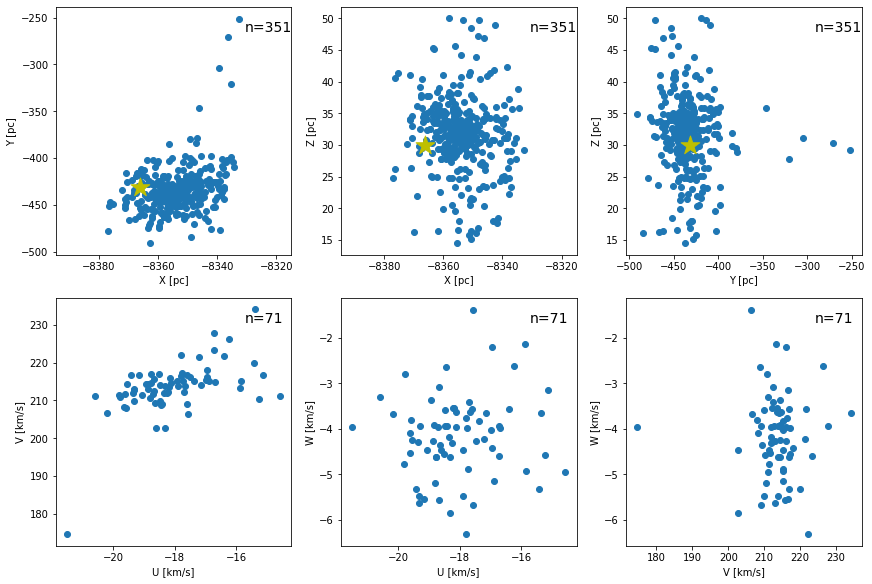

In [23]:
fig = plot_xyz_uvw(df=df_mem_gaia_params, target_gaia_id=t.gaiaid);
pl.title(c.cluster_name)

## toi 893 in NGC_2306?

In [24]:
from chronos.search import Cluster

c = Cluster(cluster_name='NGC_2306', verbose=False)
df_mem = c.query_cluster_members()
df_mem.shape

(168, 22)

In [25]:
df_mem_gaia_params = c.query_cluster_members_gaia_params(df=None, radius=3, clobber=False)
df_mem_gaia_params.shape

(97, 95)

In [26]:
from chronos.search import Target
t = Target(toiid=893.01, verbose=False)
#query gaia catalog and set target gaia id
_ = t.query_gaia_dr2_catalog(radius=3, return_nearest_xmatch=True)

In [27]:
t.gaiaid

3099242937596214272

Text(0.5, 1.0, 'NGC_2306')

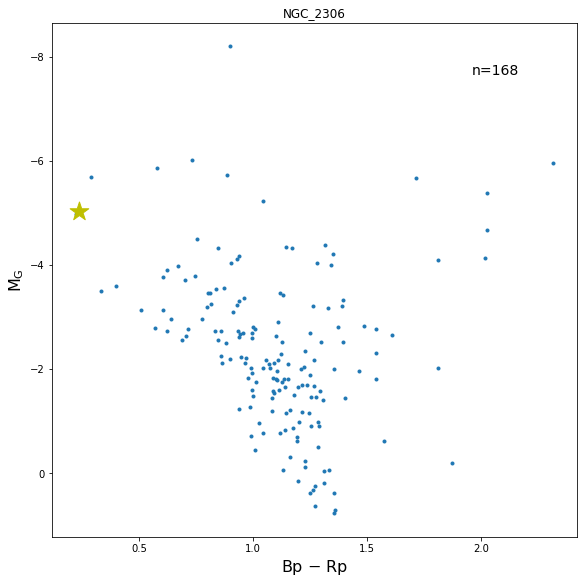

In [31]:
from chronos.plot import plot_hrd
import matplotlib.pyplot as pl

fig = plot_hrd(df=df_mem, target_gaia_id=t.gaiaid);
fig.axes[0].set_title(c.cluster_name)

Text(0.5, 0.98, '')

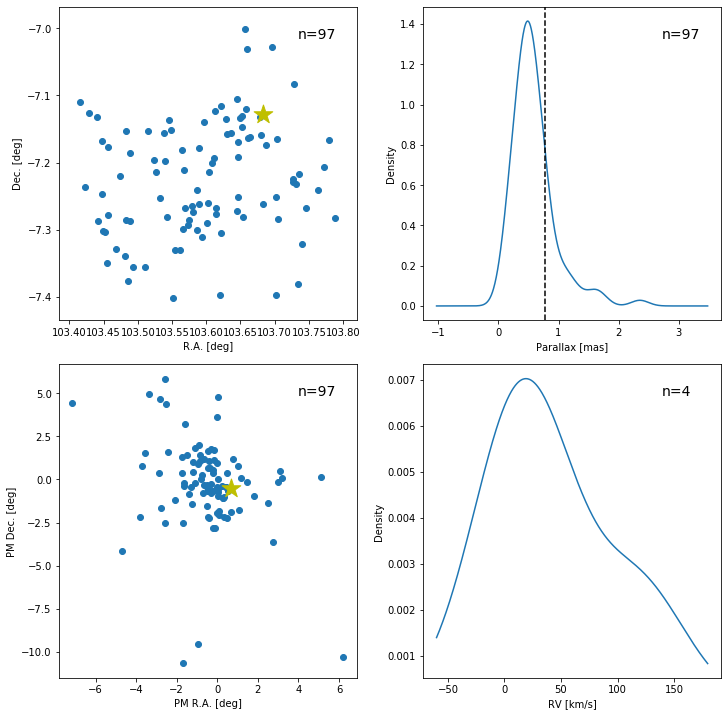

In [32]:
from chronos.plot import plot_rdp_pmrv
fig = plot_rdp_pmrv(df=df_mem_gaia_params, target_gaia_id=t.gaiaid);
fig.suptitle(c.cluster_name)

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



Text(0.5, 0.98, 'NGC_2306')

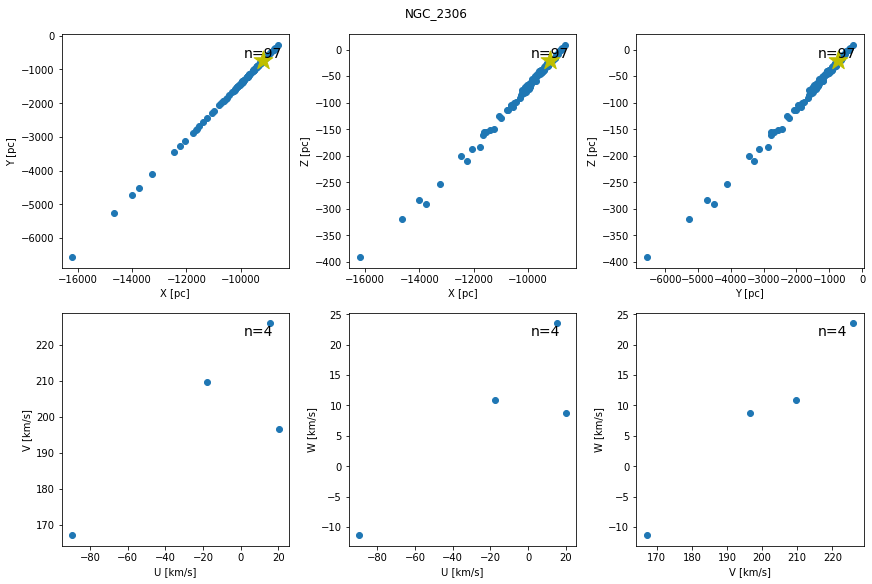

In [35]:
from chronos.plot import plot_xyz_uvw

fig = plot_xyz_uvw(df=df_mem_gaia_params, target_gaia_id=t.gaiaid, verbose=True);
fig.suptitle(c.cluster_name)

## toi 681 in NGC_2516?	

In [36]:
from chronos.search import Cluster

c = Cluster(cluster_name='NGC_2516', verbose=False)
df_mem = c.query_cluster_members()
df_mem.shape

(1512, 22)

In [37]:
#limit only to bright members
df_mem = df_mem[df_mem.phot_g_mean_mag<16]

In [38]:
df_mem_gaia_params = c.query_cluster_members_gaia_params(df=df_mem, radius=3, clobber=False)
df_mem_gaia_params.shape

(1110, 95)

In [39]:
from chronos.search import Target
t = Target(toiid=681.01, verbose=False)
#query gaia catalog and set target gaia id
_ = t.query_gaia_dr2_catalog(radius=3, return_nearest_xmatch=True)

In [40]:
t.gaiaid

5290968085934209152

Text(0.5, 1.0, 'NGC_2516')

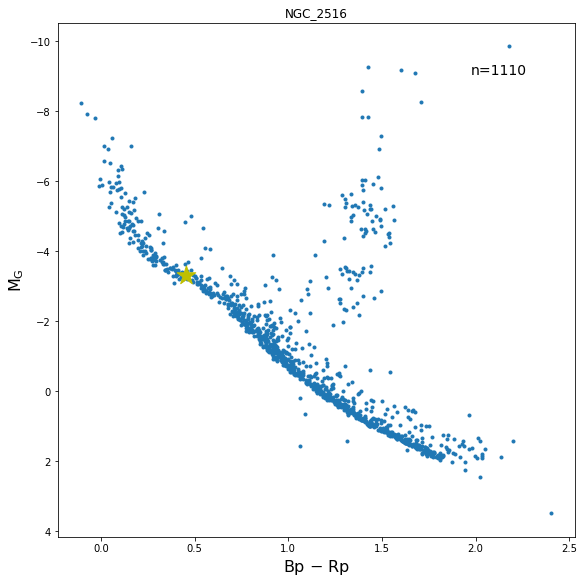

In [41]:
from chronos.plot import plot_hrd
import matplotlib.pyplot as pl

fig = plot_hrd(df=df_mem, target_gaia_id=t.gaiaid);
fig.axes[0].set_title(c.cluster_name)

Text(0.5, 0.98, 'NGC_2516')

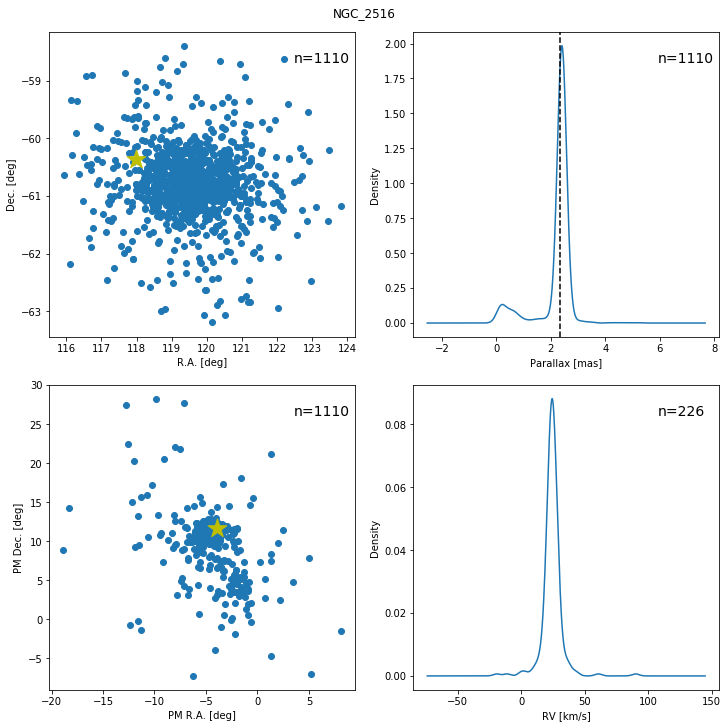

In [42]:
from chronos.plot import plot_rdp_pmrv
fig = plot_rdp_pmrv(df=df_mem_gaia_params, target_gaia_id=t.gaiaid);
fig.suptitle(c.cluster_name)

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



Text(0.5, 0.98, 'NGC_2516')

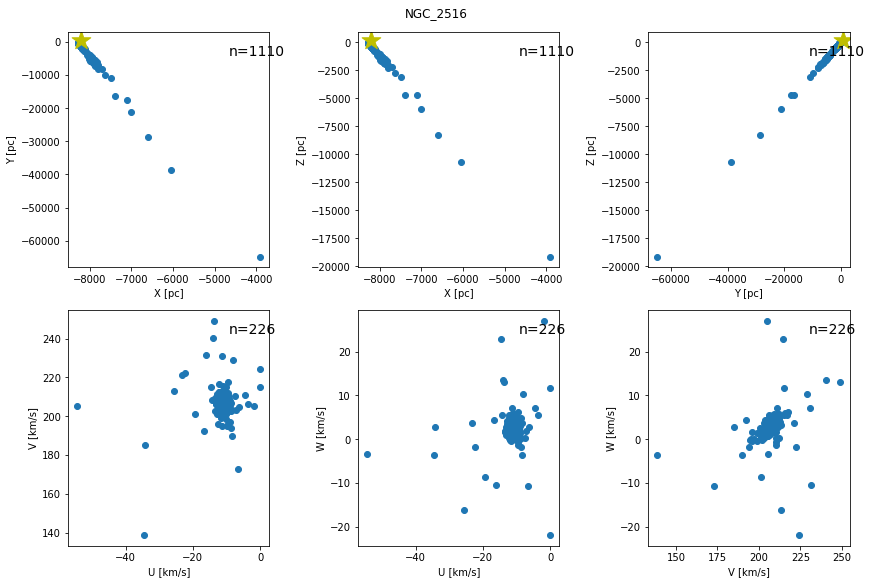

In [43]:
from chronos.plot import plot_xyz_uvw

fig = plot_xyz_uvw(df=df_mem_gaia_params, target_gaia_id=t.gaiaid, verbose=True);
fig.suptitle(c.cluster_name)

## toi 580 in Vel_OB2

In [44]:
from chronos.search import Cluster

c = Cluster(cluster_name='Vel_OB2', verbose=False)
df_mem = c.query_cluster_members()
df_mem.shape

(371, 22)

In [45]:
df_mem_gaia_params = c.query_cluster_members_gaia_params(df=df_mem, radius=3, clobber=False)
df_mem_gaia_params.shape

(371, 95)

In [46]:
from chronos.search import Target
t = Target(toiid=580.01, verbose=False)
#query gaia catalog and set target gaia id
_ = t.query_gaia_dr2_catalog(radius=3, return_nearest_xmatch=True)

In [47]:
t.gaiaid

5519619186857962112

Text(0.5, 1.0, 'Vel_OB2')

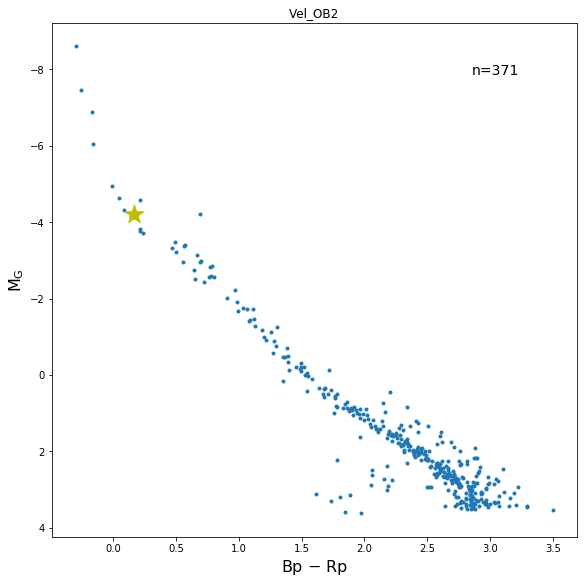

In [48]:
from chronos.plot import plot_hrd
import matplotlib.pyplot as pl

fig = plot_hrd(df=df_mem, target_gaia_id=t.gaiaid);
fig.axes[0].set_title(c.cluster_name)

Text(0.5, 0.98, '')

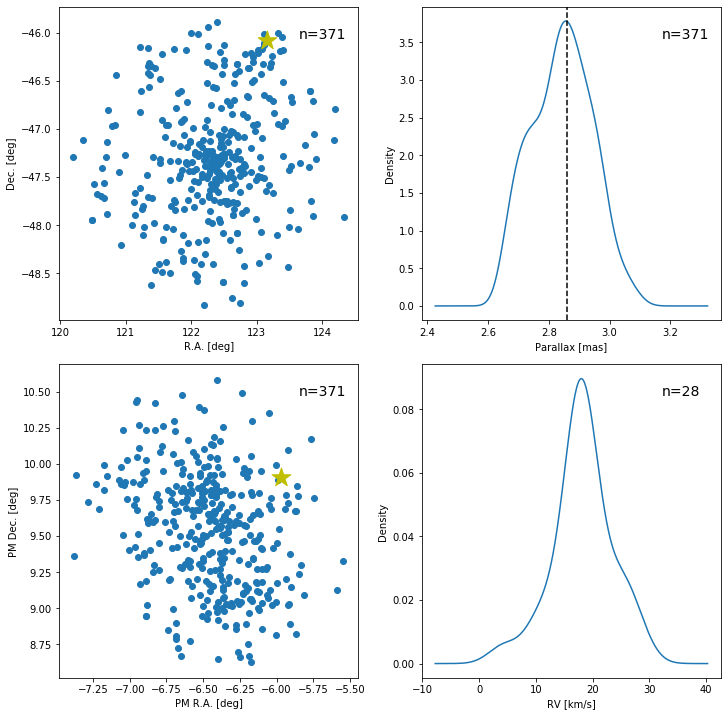

In [49]:
from chronos.plot import plot_rdp_pmrv
fig = plot_rdp_pmrv(df=df_mem_gaia_params, target_gaia_id=t.gaiaid);
fig.suptitle(c.cluster_name)

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



Text(0.5, 0.98, '')

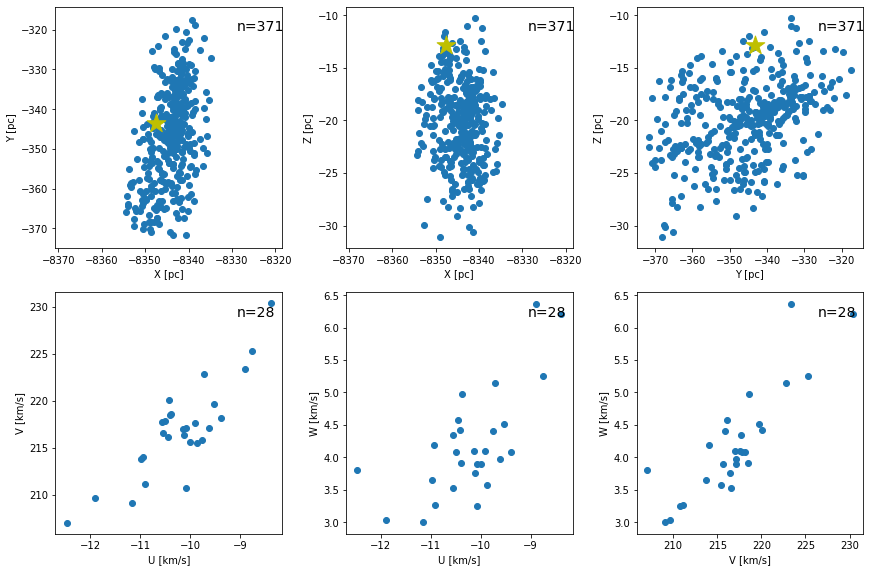

In [50]:
from chronos.plot import plot_xyz_uvw

fig = plot_xyz_uvw(df=df_mem_gaia_params, target_gaia_id=t.gaiaid, verbose=True);
fig.suptitle(c.cluster_name)

## toi 839 in Loden_306

In [51]:
from chronos.search import Cluster

c = Cluster(cluster_name='Loden_306', verbose=False)
df_mem = c.query_cluster_members()
df_mem.shape

(438, 22)

In [52]:
df_mem_gaia_params = c.query_cluster_members_gaia_params(df=df_mem, radius=3, clobber=False)
df_mem_gaia_params.shape

(342, 95)

In [53]:
from chronos.search import Target
t = Target(toiid=839.01, verbose=False)
#query gaia catalog and set target gaia id
_ = t.query_gaia_dr2_catalog(radius=3, return_nearest_xmatch=True)

In [54]:
t.gaiaid

5337273743301313536

Text(0.5, 1.0, 'Loden_306')

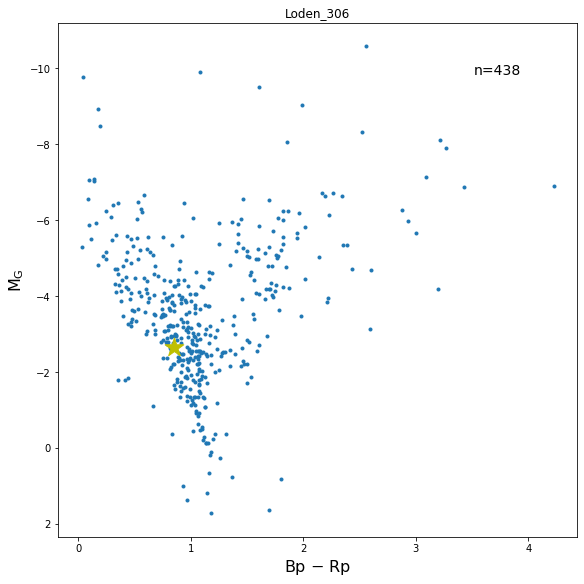

In [55]:
from chronos.plot import plot_hrd
import matplotlib.pyplot as pl

fig = plot_hrd(df=df_mem, target_gaia_id=t.gaiaid);
fig.axes[0].set_title(c.cluster_name)

Text(0.5, 0.98, 'Loden_306')

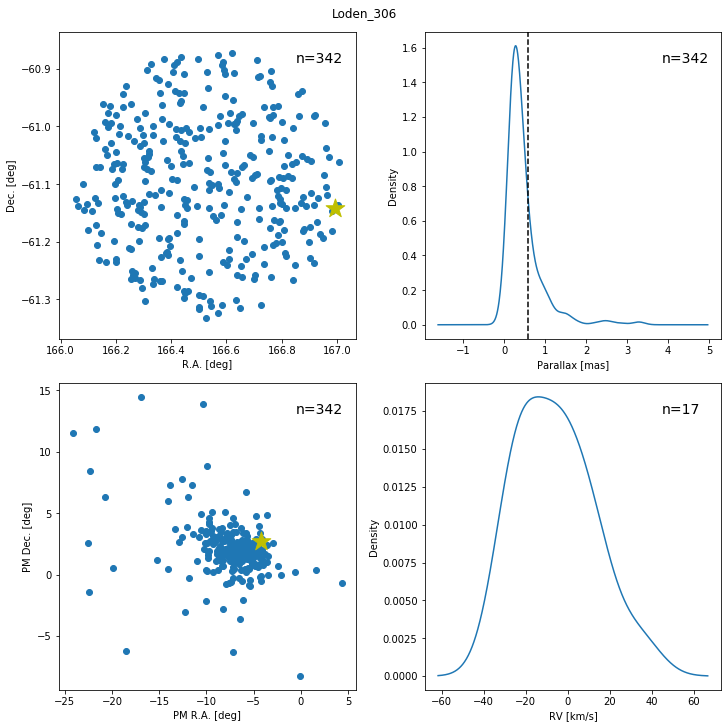

In [58]:
from chronos.plot import plot_rdp_pmrv
fig = plot_rdp_pmrv(df=df_mem_gaia_params, target_gaia_id=t.gaiaid);
fig.suptitle(c.cluster_name)

Some parallaxes are negative!
See: https://arxiv.org/pdf/1804.09366.pdf
These are removed for the meantime.



Text(0.5, 0.98, 'Loden_306')

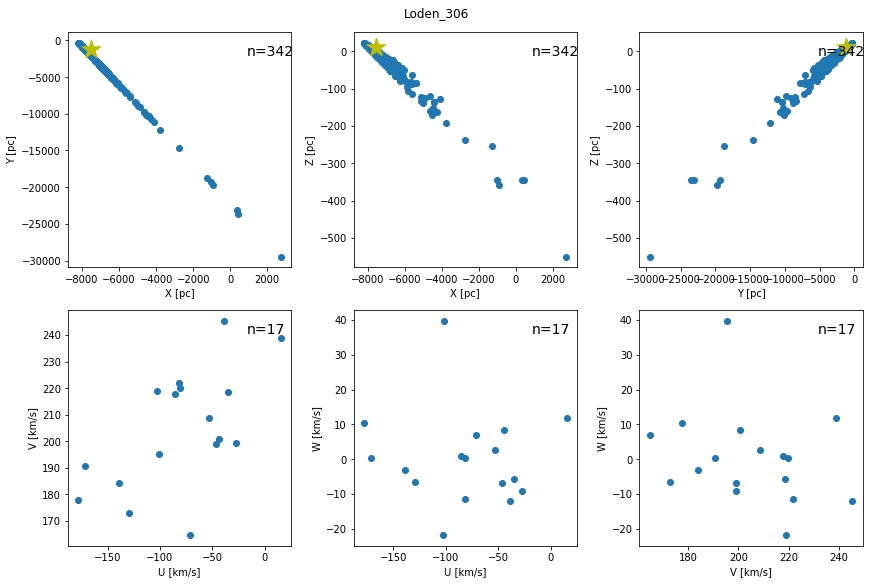

In [57]:
from chronos.plot import plot_xyz_uvw

fig = plot_xyz_uvw(df=df_mem_gaia_params, target_gaia_id=t.gaiaid, verbose=True);
fig.suptitle(c.cluster_name)